# End-to-End

Generate MS text -> EN Knowledge Graph Triples format.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/e2e-text-to-kg](https://github.com/huseinzol05/Malaya/tree/master/example/e2e-text-to-kg).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import logging

logging.basicConfig(level=logging.INFO)

In [3]:
%%time

import malaya

CPU times: user 3.58 s, sys: 2.61 s, total: 6.19 s
Wall time: 3.04 s


### List available HuggingFace model

In [5]:
malaya.text_to_kg.e2e.available_huggingface()

INFO:malaya.text_to_kg.e2e:tested on test set 02 part translated KELM, https://huggingface.co/datasets/mesolitica/translated-REBEL


,Size (MB),BLEU,SacreBLEU Verbose,Suggested length
mesolitica/finetune-ttkg-t5-tiny-standard-bahasa-cased,139,61.067843,86.1/68.4/55.8/45.9 (BP = 0.980 ratio = 0.980 ...,256
mesolitica/finetune-ttkg-t5-small-standard-bahasa-cased,242,61.559203,86.0/68.4/56.1/46.3 (BP = 0.984 ratio = 0.984 ...,256
mesolitica/finetune-ttkg-t5-base-standard-bahasa-cased,892,58.764876,84.5/65.8/53.0/43.1 (BP = 0.984 ratio = 0.985 ...,256


### Load HuggingFace model

```python
def huggingface(model: str = 'mesolitica/finetune-ttkg-t5-small-standard-bahasa-cased', **kwargs):
    """
    Load HuggingFace model to End-to-End text to knowledge graph.

    Parameters
    ----------
    model: str, optional (default='mesolitica/finetune-ttkg-t5-small-standard-bahasa-cased')
        Check available models at `malaya.text_to_kg.e2e.available_huggingface()`.

    Returns
    -------
    result: malaya.torch_model.huggingface.TexttoKG
    """
```

In [22]:
model = malaya.text_to_kg.e2e.huggingface()

In [7]:
string1 = "Yang Berhormat Dato Sri Haji Mohammad Najib bin Tun Haji Abdul Razak ialah ahli politik Malaysia dan merupakan bekas Perdana Menteri Malaysia ke-6 yang mana beliau menjawat jawatan dari 3 April 2009 hingga 9 Mei 2018. Beliau juga pernah berkhidmat sebagai bekas Menteri Kewangan dan merupakan Ahli Parlimen Pekan Pahang"
string2 = "Pahang ialah negeri yang ketiga terbesar di Malaysia Terletak di lembangan Sungai Pahang yang amat luas negeri Pahang bersempadan dengan Kelantan di utara Perak Selangor serta Negeri Sembilan di barat Johor di selatan dan Terengganu dan Laut China Selatan di timur."

#### Predict

```python
def generate(self, strings: List[Dict], got_networkx: bool = True, **kwargs):
    """
    Generate list of knowledge graphs from the input.

    Parameters
    ----------
    strings : List[str]
    got_networkx: bool, optional (default=True)
        If True, will generate networkx.MultiDiGraph.
    **kwargs: vector arguments pass to huggingface `generate` method.
        Read more at https://huggingface.co/docs/transformers/main_classes/text_generation

    Returns
    -------
    result: List[List[Dict]]
    """
```

In [8]:
r = model.generate([string1, string2], max_length = 256)

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [9]:
r

[{'G': <networkx.classes.multidigraph.MultiDiGraph at 0x7fa03ae0f550>,
  'triple': [{'head': 'Mohammad Najib',
    'type': 'occupation',
    'tail': 'Politician'},
   {'head': 'Mohammad Najib',
    'type': 'position held',
    'tail': 'Prime Minister of Malaysia'},
   {'head': 'Mohammad Najib',
    'type': 'country of citizenship',
    'tail': 'Malaysia'}],
  'rebel': '<triplet> Mohammad Najib <subj> Politician <obj> occupation <subj> Prime Minister of Malaysia <obj> position held <subj> Malaysia <obj> country of citizenship'},
 {'G': <networkx.classes.multidigraph.MultiDiGraph at 0x7fa1944ae7c0>,
  'triple': [{'head': 'Pahang', 'type': 'country', 'tail': 'Malaysia'},
   {'head': 'Pahang', 'type': 'shares border with', 'tail': 'Perak'},
   {'head': 'Pahang', 'type': 'shares border with', 'tail': 'Johor'},
   {'head': 'Pahang', 'type': 'shares border with', 'tail': 'Terengganu'},
   {'head': 'Pahang', 'type': 'shares border with', 'tail': 'Negeri Sembilan'},
   {'head': 'Pahang',
    't

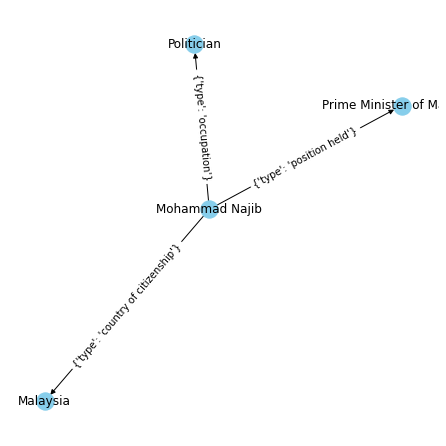

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

g = r[0]['G']
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()

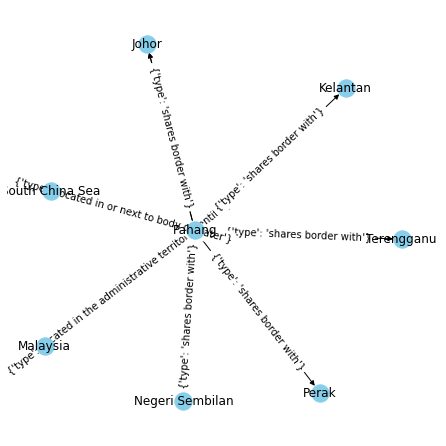

In [11]:
g = r[1]['G']
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()

### Combine multiple texts

In [12]:
# https://ms.wikipedia.org/wiki/Malaysia

string = """
Malaysia secara rasminya Persekutuan Malaysia ialah sebuah negara raja berperlembagaan persekutuan di Asia Tenggara yang terdiri daripada tiga belas negeri dan tiga wilayah persekutuan, yang menduduki bumi berkeluasan 330,803 kilometer persegi (127,720 bt2). Malaysia terbahagi kepada dua kawasan yang mengapit Laut China Selatan, iaitu Semenanjung Malaysia dan Borneo Malaysia (juga Malaysia Barat dan Timur). Malaysia berkongsi sempadan darat dengan Thailand, Indonesia, dan Brunei dan juga sempadan laut dengan Singapura dan Filipina. Ibu negara Malaysia ialah Kuala Lumpur, manakala Putrajaya merupakan pusat kerajaan persekutuan. Pada tahun 2009, Malaysia diduduki oleh 28 juta penduduk dan pada tahun 2017 dianggarkan telah mencecah lebih 30 juta orang yang menduduki di Malaysia.

Malaysia berakar-umbikan Kerajaan-kerajaan Melayu yang wujud di wilayahnya dan menjadi taklukan Empayar British sejak abad ke-18. Wilayah British pertama di sini dikenali sebagai Negeri-Negeri Selat. Semenanjung Malaysia yang ketika itu dikenali sebagai Tanah Melayu atau Malaya, mula-mula disatukan di bawah komanwel pada tahun 1946, sebelum menjadi Persekutuan Tanah Melayu pada tahun 1948. Pada tahun 1957 Semenanjung Malaysia mencapai Kemerdekaan dan bebas daripada penjajah dan sekali gus menjadi catatan sejarah terpenting bagi Malaysia. Pada tahun 1963, Tanah Melayu bersatu bersama dengan negara Sabah, Sarawak, dan Singapura bagi membentuk Malaysia. Pada tahun 1965, Singapura keluar dari persekutuan untuk menjadi negara kota yang bebas. Semenjak itu, Malaysia menikmati antara ekonomi yang terbaik di Asia, dengan purata pertumbuhan keluaran dalam negara kasarnya (KDNK) kira-kira 6.5% selama 50 tahun pertama kemerdekaannya. 

Ekonomi negara yang selama ini dijana oleh sumber alamnya kini juga berkembang dalam sektor-sektor ukur tanah, sains, kejuruteraan, pendidikan, pelancongan, perkapalan, perdagangan dan perubatan.

Ketua negara Malaysia ialah Yang di-Pertuan Agong, iaitu raja elektif yang terpilih dan diundi dari kalangan sembilan raja negeri Melayu. Ketua kerajaannya pula ialah Perdana Menteri. Sistem kerajaan Malaysia banyak berdasarkan sistem parlimen Westminster, dan sistem perundangannya juga berasaskan undang-undang am Inggeris.

Malaysia terletak berdekatan dengan khatulistiwa dan beriklim tropika, serta mempunyai kepelbagaian flora dan fauna, sehingga diiktiraf menjadi salah satu daripada 17 negara megadiversiti. Di Malaysia terletaknya Tanjung Piai, titik paling selatan di seluruh tanah besar Eurasia. Malaysia ialah sebuah negara perintis Persatuan Negara-Negara Asia Tenggara dan Pertubuhan Persidangan Islam, dan juga anggota Kerjasama Ekonomi Asia-Pasifik, Negara-Negara Komanwel, dan Pergerakan Negara-Negara Berkecuali.
"""

In [13]:
def simple_cleaning(string):
    return ''.join([s for s in string if s not in ',.\'";'])

string = malaya.text.function.split_into_sentences(string)
string = [simple_cleaning(s) for s in string if len(s) > 50]
string

['Malaysia secara rasminya Persekutuan Malaysia ialah sebuah negara raja berperlembagaan persekutuan di Asia Tenggara yang terdiri daripada tiga belas negeri dan tiga wilayah persekutuan yang menduduki bumi berkeluasan 330803 kilometer persegi (127720 bt2)',
 'Malaysia terbahagi kepada dua kawasan yang mengapit Laut China Selatan iaitu Semenanjung Malaysia dan Borneo Malaysia (juga Malaysia Barat dan Timur)',
 'Malaysia berkongsi sempadan darat dengan Thailand Indonesia dan Brunei dan juga sempadan laut dengan Singapura dan Filipina',
 'Ibu negara Malaysia ialah Kuala Lumpur manakala Putrajaya merupakan pusat kerajaan persekutuan Pada tahun 2009 Malaysia diduduki oleh 28 juta penduduk dan pada tahun 2017 dianggarkan telah mencecah lebih 30 juta orang yang menduduki di Malaysia',
 'Malaysia berakar-umbikan Kerajaan-kerajaan Melayu yang wujud di wilayahnya dan menjadi taklukan Empayar British sejak abad ke-18 Wilayah British pertama di sini dikenali sebagai Negeri-Negeri Selat',
 'Semena

In [14]:
r = model.generate(string, max_length = 256)

In [15]:
g = r[0]['G']

for i in range(1, len(r), 1):
    g.update(r[i]['G'])

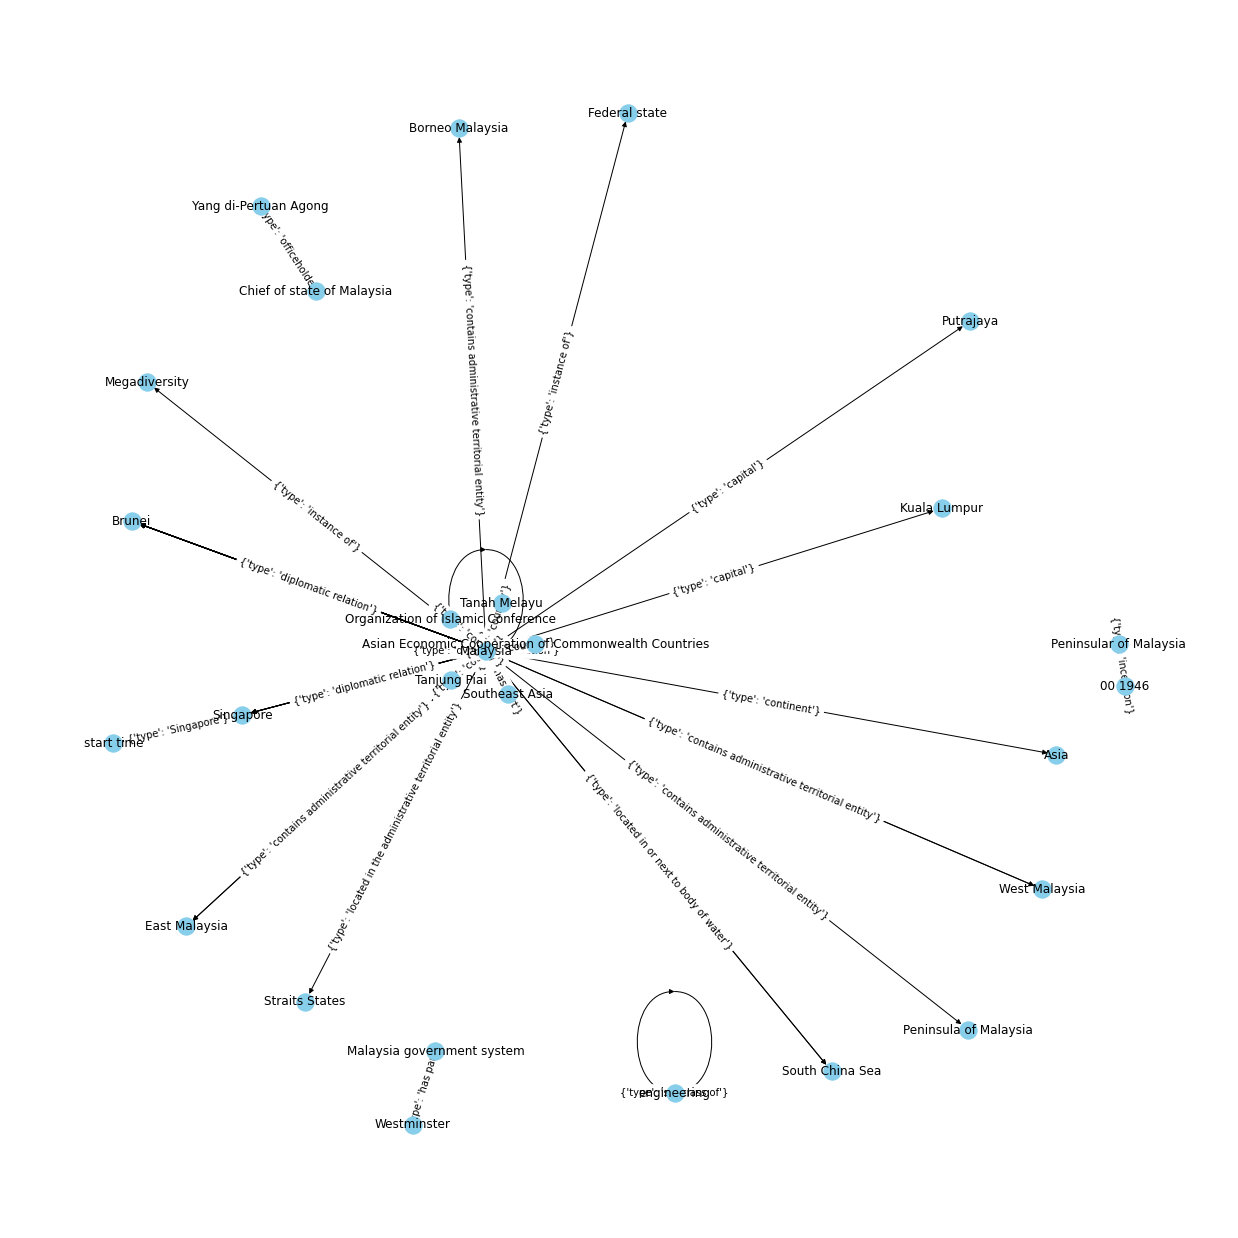

In [16]:
plt.figure(figsize=(17, 17))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()

In [17]:
# https://www.utusan.com.my/terkini/2021/07/agong-dukacita-ketua-pembangkang-tuntut-pm-letak-jawatan/
# https://www.hmetro.com.my/mutakhir/2021/07/736206/kediaman-pm-jadi-tumpuan-media

string = """
KUALA LUMPUR: Ketua Pembangkang, Datuk Seri Anwar Ibrahim menggesa Perdana Menteri, Tan Sri Muhyiddin Yassin meletak jawatan susulan kenyataan dikeluarkan Istana Negara berhubung isu Proklamasi Darurat.

“Ini menunjukkan Kabinet yang diketuai Tan Sri Muhyiddin melanggar Perlembagaan menghina instusi raja Perlembagaan termasuk menteri di Jabatan Perdana Menteri mengelirukan Dewan.

“Oleh yang demikian, kita menuntut Perdana Menteri meletak jawatan,” ujarnya hari ini.

Terdahulu, Yang di-Pertuan Agong, Al-Sultan Abdullah Ri’ayatuddin Al-Mustafa Billah Shah menzahirkan rasa dukacita dengan pengumuman pembatalan darurat di Parlimen.

Perkara itu dimaklumkan Datuk Pengelola Bijaya Diraja Istana Negara, Datuk Indera Ahmad Fadil Shamsudddin dalam satu kenyataan hari ini.

“Sehubungan dengan itu, Seri Paduka Baginda menzahirkan rasa amat dukacita dengan kenyataan yang telah dibuat pada 26 Julai, 2021 lalu bahawa kerajaan telah membatalkan semua Ordinan Darurat yang telah dimasyhurkan oleh Baginda sepanjang tempoh darurat walhal belum lagi diperkenan baginda,” katanya.

Kuala Lumpur: Kediaman Perdana Menteri Tan Sri Muhyiddin Yassin menjadi tumpuan petugas media susulan kenyataan yang dikeluarkan Istana Negara berhubung isu pembatalan Ordinan Darurat hari ini.

Petugas media dilihat mula 'berkampung' di rumah Perdana Menteri yang terletak di Bukit Damansara di sini, sejak 1 tengah hari ini.

Pemerhatian Bernama mendapati beberapa kenderaan dipercayai membawa menteri dan Peguam Negara memasuki pekarangan kediaman Perdana Menteri pada 1.30 tengah hari.

Dalam kenyataan Istana Negara itu, Yang di-Pertuan Agong Al-Sultan Abdullah Ri'ayatuddin Al-Mustafa Billah Shah menzahirkan rasa amat dukacita dengan kenyataan di Parlimen pada Isnin bahawa kerajaan membatalkan semua Ordinan Darurat walhal ia belum lagi diperkenan Seri Paduka.

Yang di-Pertuan Agong juga amat dukacita kerana apa yang diperkenan dan dititahkan kepada Menteri di Jabatan Perdana Menteri (Parlimen dan Undang-Undang) Datuk Seri Takiyuddin Hassan serta Peguam Negara Tan Sri Idrus Harun bahawa cadangan pembatalan semua Ordinan Darurat dibentang dan dibahaskan di Parlimen bagi tujuan diungkaikan tidak dilaksanakan.
"""

In [18]:
def simple_cleaning(string):
    return ''.join([s for s in string if s not in ',.\'";'])

string = malaya.text.function.split_into_sentences(string)
string = [simple_cleaning(s) for s in string if len(s) > 50]
string

['KUALA LUMPUR: Ketua Pembangkang Datuk Seri Anwar Ibrahim menggesa Perdana Menteri Tan Sri Muhyiddin Yassin meletak jawatan susulan kenyataan dikeluarkan Istana Negara berhubung isu Proklamasi Darurat',
 'Ini menunjukkan Kabinet yang diketuai Tan Sri Muhyiddin melanggar Perlembagaan menghina instusi raja Perlembagaan termasuk menteri di Jabatan Perdana Menteri mengelirukan Dewan',
 'Oleh yang demikian kita menuntut Perdana Menteri meletak jawatan ujarnya hari ini',
 'Terdahulu Yang di-Pertuan Agong Al-Sultan Abdullah Riayatuddin Al-Mustafa Billah Shah menzahirkan rasa dukacita dengan pengumuman pembatalan darurat di Parlimen',
 'Perkara itu dimaklumkan Datuk Pengelola Bijaya Diraja Istana Negara Datuk Indera Ahmad Fadil Shamsudddin dalam satu kenyataan hari ini',
 'Sehubungan dengan itu Seri Paduka Baginda menzahirkan rasa amat dukacita dengan kenyataan yang telah dibuat pada 26 Julai 2021 lalu bahawa kerajaan telah membatalkan semua Ordinan Darurat yang telah dimasyhurkan oleh Bagind

In [19]:
r = model.generate(string, max_length = 256)

In [20]:
g = r[0]['G']

for i in range(1, len(r), 1):
    g.update(r[i]['G'])

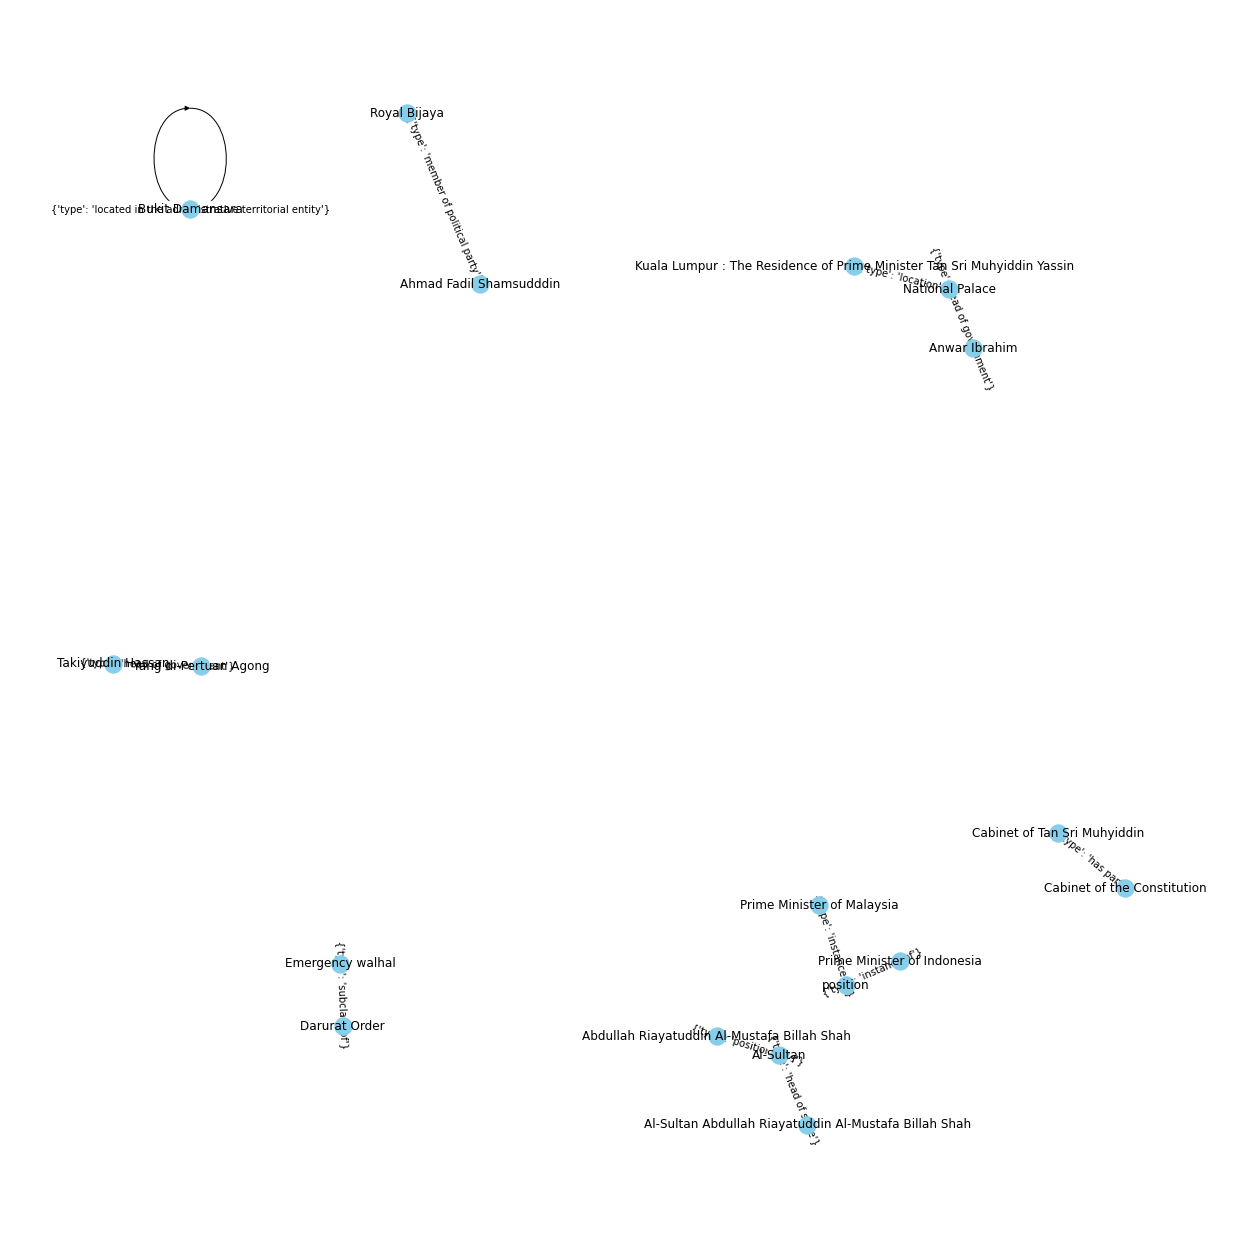

In [21]:
plt.figure(figsize=(17, 17))
pos = nx.spring_layout(g)
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx_edge_labels(g, pos=pos)
plt.show()